# U-Net Model (Prediction)

## Import Libraries, Modules, & Scripts

In [1]:
import torch
import os
import random
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

from dataset import dataset
from unet import unet

## Set Paths

In [2]:
DATA_PATH = '25-ds-casia-un-tvt/train_tp'
MASK_PATH = '25-ds-casia-un-tvt/train_gt'
MODEL_PATH = 'un-model/ds4-un-model.pth'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## U-Net Prediction Function

In [4]:
def single_image_inference(image_pth, mask_pth, model_pth, device):
    model = unet(in_channels=3, num_classes=1).to(device)
    model.load_state_dict(torch.load(model_pth, map_location=torch.device(device)))

    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()])

    img = transform(Image.open(image_pth)).float().to(device)
    img = img.unsqueeze(0)

    pred_mask = model(img)

    img = img.squeeze(0).cpu().detach()
    img = img.permute(1, 2, 0)

    pred_mask = pred_mask.squeeze(0).cpu().detach()
    pred_mask = pred_mask.permute(1, 2, 0)
    pred_mask[pred_mask < 0] = 0
    pred_mask[pred_mask > 0] = 1

    ground_truth_mask = transform(Image.open(mask_pth)).float().cpu()
    ground_truth_mask = ground_truth_mask.squeeze(0)
    ground_truth_mask[ground_truth_mask < 0] = 0
    ground_truth_mask[ground_truth_mask > 0] = 1

    fig = plt.figure(figsize=(15, 5))
    for i in range(1, 4):
        fig.add_subplot(1, 3, i)
        if i == 1:
            plt.imshow(img, cmap="gray")
            plt.title('Input Image')
        elif i == 2:
            plt.imshow(pred_mask, cmap="gray")
            plt.title('Predicted Mask')
        else:
            plt.imshow(ground_truth_mask, cmap="gray")
            plt.title('Ground Truth Mask')
    plt.show()

In [5]:
def get_random_image_and_mask_paths(data_path, mask_path):
    all_images = [img for img in os.listdir(data_path) if img.endswith(('.jpg', '.tif'))]
    random_image = random.choice(all_images)
    random_image_path = os.path.join(data_path, random_image)
    
    # Construct ground truth mask path
    mask_filename = random_image.rsplit('.', 1)[0] + '_gt.png'
    ground_truth_mask_path = os.path.join(mask_path, mask_filename)
    
    return random_image_path, ground_truth_mask_path

## Create Prediction

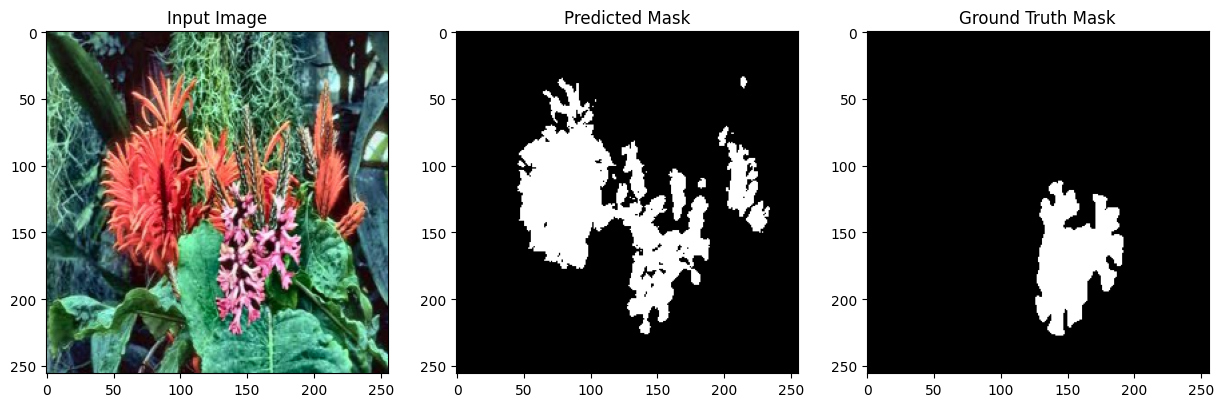

In [45]:
random_image_path, ground_truth_mask_path = get_random_image_and_mask_paths(DATA_PATH, MASK_PATH)
single_image_inference(random_image_path, ground_truth_mask_path, MODEL_PATH, device)